⭐⭐ **Life Expectancy Regression** ⭐⭐

**Paso 0. Subir o cargar los datos:**

Opción A: Subir manualmente desde tu PC

Opción B: Usar Google Drive

Opción C: Descargar desde internet (ejemplo INE/Kaggle/NOAA/UNESCO)

In [56]:
# ===================================
# 0. Subida o carga del fichero que contiene el dataset de estudio
# ===================================

## Opción A: Manualmente desde tu PC en Google Colab
#from google.colab import files

#uploaded = files.upload()

## 📂 Opción B: Leer desde Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
#df_raw = pd.read_csv("/content/drive/MyDrive/tu_carpeta/life_expectancy_data.csv", sep=";", encoding="utf-8")

import sys
print(sys.executable)

# Opción C: Descargar desde Internet (ejemplo INE/Kaggle/NOAA/UNESCO)
# !wget -O dataset.csv "https://www.kaggle.com/code/wrecked22/life-expectancy-regression?scriptVersionId=127450003&cellId=5"

c:\dev\proyectos\P5_G3_Regression\venv\Scripts\python.exe


**Paso 1. Cargar librerías**
Importamos las librerías de análisis y visualización que vamos a usar:

* pandas → manipulación de datos.
* matplotlib/seaborn → visualizaciones estáticas.
* plotly → gráficos interactivos.
* sklean → herramientas ML y DS.

In [51]:
# ===================================
# 1. Plantilla de trabajo - EDA + Baseline
# ===================================

# 1. Importar librerías
import pandas as pd                                                             # Manipulación de datos y análisis
import numpy as np                                                              # Cálculos numéricos                               
import matplotlib.pyplot as plt                                                 # Gráficos básicos (histogramas, scatter, etc.).
import seaborn as sns                                                           # Gráficos estadísticos con menos código (heatmaps, distribuciones…)

from sklearn.model_selection import train_test_split, cross_val_score           # División de dataset en entrenamiento y validación cruzada  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # Librería ML en Python: Métricas de evaluación de modelos
from sklearn.linear_model import LinearRegression                               # Regresión Lineal
from sklearn.tree import DecisionTreeRegressor                                  # Árbol de Decisión
from sklearn.ensemble import RandomForestRegressor                              # Random Forest
from sklearn.preprocessing import StandardScaler, MinMaxScaler                  # Escalado de variables (normalización y estandarización)
from tabulate import tabulate                                                   # Tablas bonitas en consola

**Paso 2. Leer el CSV**



In [57]:
# ===================================
# 2. Cargar dataset
# (el archivo debe estar en la carpeta data/)
# ===================================

df = pd.read_csv("../data/life_expectancy_data.csv")

# Vista general
print("Dimensiones:", df.shape)
display(df.head(10))  # 👈 muestra primeras 10 filas en formato tabla

# Separador visual
print("\n" + "="*50 + "\n")

# Información detallada de columnas
df.info()

print("\n" + "="*50 + "\n")


Dimensiones: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio             

**Paso 3. EDA inicial**



Columnas disponibles: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


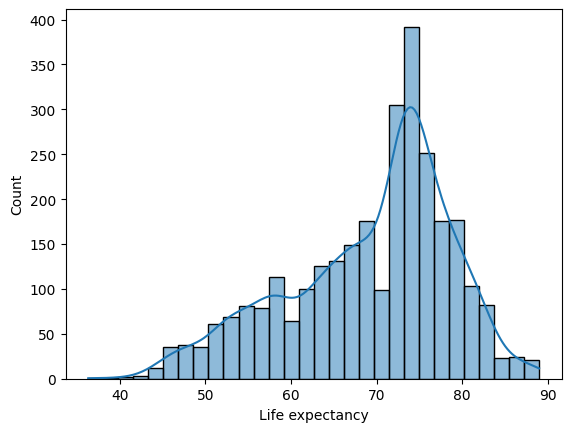

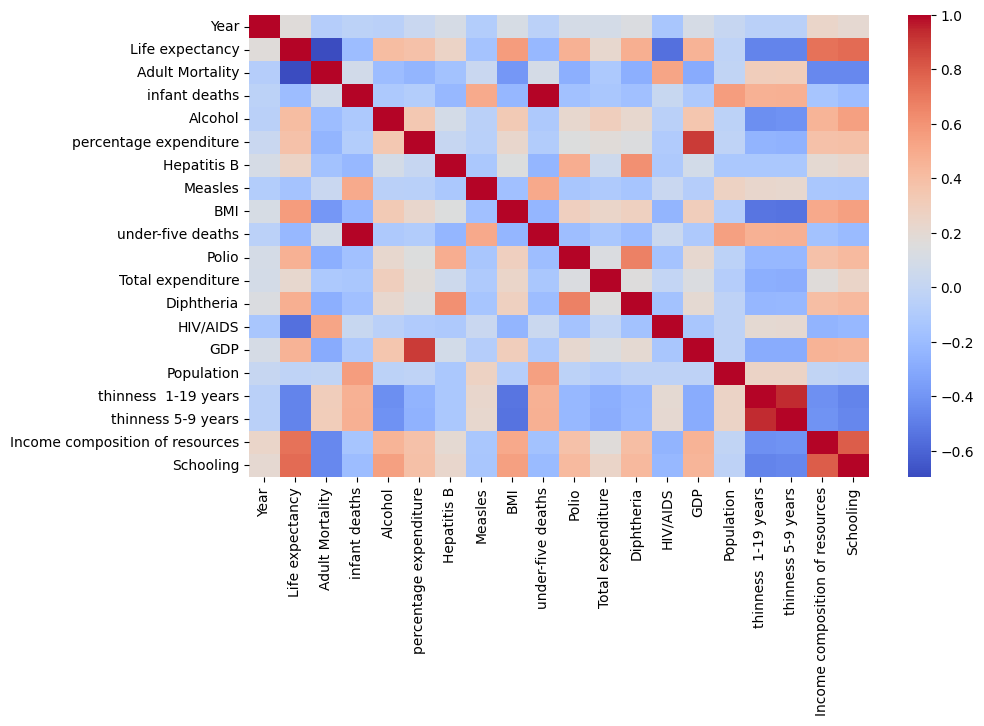

📊 Correlaciones con la variable objetivo:
Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.471584
thinness  1-19 years              -0.477183
HIV/AIDS                          -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy, dtype: float64


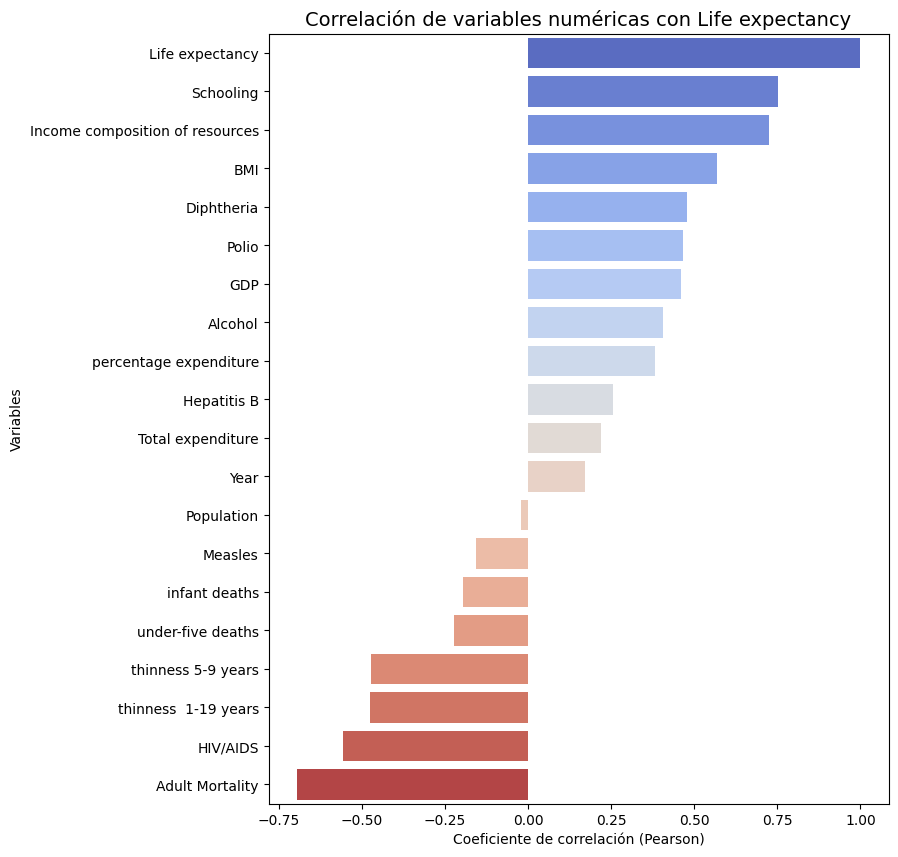

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness  1-19 years                34
thinness 5-9 years                  34
BMI                                 34
dtype: int64


In [58]:
# ===================================
# 3. EDA inicial
# ===================================

# Revisar nombres de columnas
print("Columnas disponibles:", df.columns.tolist())

# Limpiar espacios en nombres de columnas
df.columns = df.columns.str.strip()

# Definir variable objetivo
target_col = "Life expectancy"  # <-- cambiar según dataset

# Distribución de la variable objetivo
sns.histplot(df[target_col], kde=True)
plt.show()

# ===================================
# Seleccionar solo numéricas para correlaciones
# ===================================
df_num = df.select_dtypes(include=["int64", "float64"])

# Heatmap de todas las correlaciones numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), cmap="coolwarm", annot=False)
plt.show()

# ===================================
# Correlación de todas las variables numéricas con la variable objetivo
# ===================================
correlaciones = df_num.corr()[target_col].sort_values(ascending=False)

print("📊 Correlaciones con la variable objetivo:")
print(correlaciones)

# Visualización como gráfico de barras
plt.figure(figsize=(8, 10))
sns.barplot(x=correlaciones.values,
    y=correlaciones.index,
    hue=correlaciones.index,  # usar cada variable como hue
    palette="coolwarm",
    dodge=False,
    legend=False
)
plt.title(f"Correlación de variables numéricas con {target_col}", fontsize=14)
plt.xlabel("Coeficiente de correlación (Pearson)")
plt.ylabel("Variables")
plt.show()

# ===================================
# Valores nulos
# ===================================
print(df.isnull().sum().sort_values(ascending=False).head(10))


**Paso 4. Procesamiento + limpieza**

1. Podemos quitar columnas que:
- tengan muchos nulos (ej. >40-50%).
- no aporten nada (ej. identificadores, códigos sin significado).

2. Usamos la mediana para rellenar valores faltantes en variables numéricas:
- Es robusta frente a outliers.
- Buena opción como primer approach.

3. Convierte variables categóricas (ej. "Country", "Status") en columnas binarias.
- drop_first=True evita la trampa de multicolinealidad (si una categoría se puede deducir de las otras, no es necesario tenerla toda).


**Qué hace este bloque**

**1. Detecta columnas con demasiados nulos → las elimina.**

**2. Rellena nulos:**
   - numéricas → mediana,
   - categóricas → "Unknown".

**3. Agrupa categorías poco frecuentes** (ejemplo: países raros → "Other").

**4. Convierte categóricas en variables dummy.**

**5. Escala variables numéricas** (solo si lo necesitáis → útil para KNN, SVR, regresión lineal).


Tras esto, el dataset queda listo para algoritmos de ML que no aceptan texto.


**Consideraciones prácticas**

**1. Orden lógico:**

     - Primero mirar valores nulos (df.isnull().sum()).
     - Decidir si se eliminan columnas con demasiados nulos.
     - Luego rellenar los que quedan.

**2. Categóricas con demasiadas categorías:**

      - Si tenemos columnas tipo "Country" con 150 países, get_dummies creará muchas columnas → puede ser ineficiente.
      - En estos casos, a veces conviene agrupar (ej. países por regiones, o top 20 más frecuentes y el resto en “otros”).

**3. Normalización/Escalado:**  
Nota: Árboles y ensembles no lo necesitan

      - No es necesario para árboles (DecisionTree, RandomForest, XGBoost).
      - Sí sería necesario en pruebas con KNN, SVR, regresión lineal.

In [59]:
# ===================================
# 4. Preprocesamiento + limpieza
# ===================================

# --------
# 0. Separar variable objetivo
# --------
y = df[target_col]
df_features = df.drop(columns=[target_col])   # copiamos solo predictores


# --------
# 1. Identificar columnas con demasiados nulos
# --------
missing = df_features.isnull().mean().sort_values(ascending=False)
print("📊 Porcentaje de valores nulos por columna:\n")
print(missing)

# Eliminar columnas con más del 40% de nulos (ejemplo)
cols_to_drop = missing[missing > 0.4].index
print("\nColumnas eliminadas por exceso de nulos (>40%):", list(cols_to_drop))
df_features = df_features.drop(columns=cols_to_drop)

# --------
# 2. Rellenar nulos
# --------
# Numéricas → rellenar con mediana
for col in df_features.select_dtypes(include=["int64", "float64"]).columns:
    df_features[col] = df_features[col].fillna(df_features[col].median())

# Categóricas → rellenar con 'Unknown'
for col in df_features.select_dtypes(include=["object"]).columns:
    df_features[col] = df_features[col].fillna("Unknown")

# --------
# 3. Reducir categorías con demasiados valores (opcional)
# --------
# Ejemplo: si 'Country' tiene 150 valores distintos, quedarnos solo con top 20
for col in df_features.select_dtypes(include=["object"]).columns:
    if df_features[col].nunique() > 20:
        top_categories = df_features[col].value_counts().index[:20]
        df_features[col] = df_features[col].apply(lambda x: x if x in top_categories else "Other")


# --------
# 4. One-hot encoding para categóricas
# --------
df_features = pd.get_dummies(df_features, drop_first=True)

# --------
# 5. Escalado (sólo para modelos sensibles a escala: regresión lineal, KNN, SVM, redes neuronales...)
# --------
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Guardamos dos datasets finales
X_no_scaling = df_features.copy()   # para árboles, Random Forest, Gradient Boosting...

# Sustituir en df si quieres tenerlo ya escalado
# df = pd.concat([X_scaled, df[target_col].reset_index(drop=True)], axis=1)


📊 Porcentaje de valores nulos por columna:

Population                         0.221920
Hepatitis B                        0.188223
GDP                                0.152485
Total expenditure                  0.076923
Alcohol                            0.066031
Income composition of resources    0.056841
Schooling                          0.055480
thinness 5-9 years                 0.011572
BMI                                0.011572
thinness  1-19 years               0.011572
Diphtheria                         0.006467
Polio                              0.006467
Adult Mortality                    0.003404
infant deaths                      0.000000
Status                             0.000000
Year                               0.000000
Country                            0.000000
under-five deaths                  0.000000
Measles                            0.000000
percentage expenditure             0.000000
HIV/AIDS                           0.000000
dtype: float64

Columnas elimina

**Paso 5. División de datos para Entrenamiento/Validación**

En este bloque:

- Separamos el dataset en **conjunto de entrenamiento (80%)** y **conjunto de validación (20%)**.  
Esto nos permite entrenar el modelo con una parte de los datos y luego evaluar su rendimiento en datos que no ha visto antes.

Hemos generado **dos versiones del dataset**, según el tipo de modelo:

- 🔹 **Dataset sin escalado (`X_no_scaling`)**:  
  Usaremos este conjunto con modelos que **no dependen de la escala de las variables**, como:
  - Árboles de decisión
  - Random Forest
  - Gradient Boosting / XGBoost / LightGBM

- 🔹 **Dataset escalado (`X_scaled`)**:  
  Usaremos este conjunto con modelos que **sí dependen de la escala de las variables**, como:
  - Regresión lineal
  - K-Nearest Neighbors (KNN)
  - Support Vector Regression (SVR)
  - Redes neuronales

De esta manera, podremos comparar los algoritmos de forma justa y evitar errores de entrenamiento.

- x = todas las columnas salvo la variable objetivo.
- y = la variable objetivo.
- train_test_split divide los datos en:
  - x_train_sc, y_train_sc (80%) → para entrenar el modelo escalado (x_train_ns, y_train_ns no escalado.)
  - x_valid_sc, y_valid_sc (20%) → para validar el modelo escalado. (x_valid_ns, y_valid_ns no escalado.)
  - random_state=42 → asegura que la división sea reproducible.

Este paso es obligatorio para poder comparar modelos en condiciones.

In [60]:
# ===================================
# 5. División train/validación
# ===================================

from sklearn.model_selection import train_test_split

# --- Dataset sin escalado (para árboles, Random Forest, Gradient Boosting...)
X_train_ns, X_valid_ns, y_train_ns, y_valid_ns = train_test_split(   # train_test_split divide los datos en: 80% entrenamiento y 20% validación
    X_no_scaling, y, test_size=0.2, random_state=42                  # random_state=42 asegura que la división sea reproducible 
)

print("🔹 Dataset sin escalado")
print("Tamaño entrenamiento:", X_train_ns.shape, y_train_ns.shape)
print("Tamaño validación:", X_valid_ns.shape, y_valid_ns.shape)

print("\n" + "="*50 + "\n")

# --- Dataset escalado (para regresión lineal, KNN, SVM, redes neuronales...)
X_train_sc, X_valid_sc, y_train_sc, y_valid_sc = train_test_split(   # train_test_split divide los datos en: 80% entrenamiento y 20% validación
    X_scaled, y, test_size=0.2, random_state=42                      # random_state=42 asegura que la división sea reproducible
)

print("🔹 Dataset escalado")
print("Tamaño entrenamiento:", X_train_sc.shape, y_train_sc.shape)
print("Tamaño validación:", X_valid_sc.shape, y_valid_sc.shape)


🔹 Dataset sin escalado
Tamaño entrenamiento: (2350, 40) (2350,)
Tamaño validación: (588, 40) (588,)


🔹 Dataset escalado
Tamaño entrenamiento: (2350, 40) (2350,)
Tamaño validación: (588, 40) (588,)


**Paso 6. Modelos Baseline**

En este bloque se construyen y evalúan tres modelos básicos de regresión para establecer una línea de referencia (*baseline*).  

Primero se define una función `evaluate_model` que:  
1. Entrena el modelo (`.fit`).  
2. Predice los valores sobre el conjunto de validación (`.predict`).  
3. Calcula tres métricas de rendimiento:
   - **RMSE (Root Mean Squared Error):** mide cuánto se alejan en promedio las predicciones de los valores reales, penalizando más los errores grandes.  
   - **MAE (Mean Absolute Error):** error medio absoluto, más robusto frente a valores extremos.  
   - **R² (Coeficiente de determinación):** indica qué porcentaje de la variabilidad de la variable objetivo explica el modelo (1 = perfecto, 0 = nada).  

A continuación, se aplican tres modelos iniciales:  
- **Regresión Lineal** → como referencia básica, simple e interpretable.  
- **Árbol de Decisión** → captura relaciones no lineales entre variables.  
- **Random Forest** → ensemble de árboles, más robusto y con mejor capacidad de generalización.  

Estos resultados sirven como comparación inicial para entender cómo se comporta el dataset con modelos simples y más complejos.



In [61]:
# ===================================
# 6. Modelos Baseline
# ===================================
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, preds) ** 0.5  # RMSE corregido
    mae = mean_absolute_error(y_valid, preds)
    r2 = r2_score(y_valid, preds)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

# Regresión Lineal
lr = LinearRegression()
lr_results = evaluate_model(lr, X_train, y_train, X_valid, y_valid)
print("Linear Regression:", lr_results)

# Árbol de Decisión
tree = DecisionTreeRegressor(random_state=42)
tree_results = evaluate_model(tree, X_train, y_train, X_valid, y_valid)
print("Decision Tree:", tree_results)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf_results = evaluate_model(rf, X_train, y_train, X_valid, y_valid)
print("Random Forest:", rf_results)




Linear Regression: {'RMSE': 3.83358380811658, 'MAE': 2.76293272497034, 'R2': 0.8304279267964362}
Decision Tree: {'RMSE': 2.526445164666755, 'MAE': 1.5370748299319732, 'R2': 0.9263514571187463}
Random Forest: {'RMSE': 1.6435147255382965, 'MAE': 1.0718061224489803, 'R2': 0.9688332437064813}


**Paso 7. Comparación de resultados**

En este bloque se recopilan los resultados de las métricas (**RMSE, MAE y R²**) de los modelos evaluados en el paso anterior.  

Los resultados se organizan en una tabla con `pandas.DataFrame`, lo que permite una comparación directa entre los modelos.  

Ejemplo (valores ficticios):

| Modelo              | RMSE  | MAE   | R²   |
|----------------------|-------|-------|------|
| Linear Regression    | 6.8   | 5.2   | 0.71 |
| Decision Tree        | 5.9   | 4.6   | 0.79 |
| Random Forest        | 4.8   | 3.9   | 0.85 |

### 🔎 Consideraciones:
- El modelo con **menor RMSE en validación** suele ser el mejor candidato.  
- Si **Random Forest o XGBoost** superan a la regresión lineal → el dataset contiene relaciones no lineales relevantes.  
- Comparar **RMSE y MAE** ayuda a detectar la presencia de *outliers*.  
- Un **R² cercano a 1** indica que el modelo explica bien la variabilidad de los datos.  
- Estos baseline no son el resultado final, pero sirven para marcar un punto de referencia que debe superarse en etapas posteriores (ensembles avanzados, optimización de hiperparámetros).  


In [48]:
# ===================================
# 7. Comparación de resultados
# ===================================
results = pd.DataFrame([lr_results, tree_results, rf_results],
                       index=["Linear Regression", "Decision Tree", "Random Forest"])
print(results)

print("📊 Comparación de modelos baseline:\n")
display(
    results.style
    .format({"RMSE": "{:.2f}", "MAE": "{:.2f}", "R2": "{:.3f}"})
    .background_gradient(cmap="Blues")
)

                       RMSE       MAE        R2
Linear Regression  3.833584  2.762933  0.830428
Decision Tree      2.526445  1.537075  0.926351
Random Forest      1.643515  1.071806  0.968833
📊 Comparación de modelos baseline:



,RMSE,MAE,R2
Linear Regression,3.83,2.76,0.830
Decision Tree,2.53,1.54,0.926
Random Forest,1.64,1.07,0.969


# Ejemplo práctico: Comparación entre Regresión Lineal y Árbol de Decisión

En este ejemplo mostramos cómo se utilizan los dos datasets preparados en el preprocesamiento:

- 🔹 **Regresión Lineal** → requiere que los datos estén **escalados** (`X_scaled`), ya que este modelo es sensible a la magnitud de las variables.  
- 🔹 **Árbol de Decisión** → funciona directamente con los datos **sin escalar** (`X_no_scaling`), ya que los árboles se basan en divisiones (umbrales) y no en distancias ni magnitudes.

Con esto buscamos:
1. Entrenar cada modelo en su dataset adecuado.  
2. Evaluar con métricas comunes (**RMSE y R²**) para poder compararlos.  
3. Observar cómo distintos algoritmos se comportan frente al mismo problema.  

👉 Este tipo de comparaciones son clave en Machine Learning, ya que nos ayudan a decidir **qué familia de modelos** se ajusta mejor a nuestro dataset.


In [55]:
# ===================================
# Ejemplo de uso de ambos datasets
# ===================================

# --- Regresión Lineal (usa X_scaled) ---
lr = LinearRegression()
lr.fit(X_train_sc, y_train_sc)
preds_lr = lr.predict(X_valid_sc)

print("📊 Linear Regression (con datos escalados)")
print("RMSE:", mean_squared_error(y_valid_sc, preds_lr) ** 0.5)
print("R2:", r2_score(y_valid_sc, preds_lr))

print("\n" + "="*50 + "\n")

# --- Árbol de Decisión (usa X_no_scaling) ---
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_ns, y_train_ns)
preds_tree = tree.predict(X_valid_ns)

print("📊 Decision Tree (con datos sin escalar)")
print("RMSE:", mean_squared_error(y_valid_ns, preds_tree) ** 0.5)
print("R2:", r2_score(y_valid_ns, preds_tree))


📊 Linear Regression (con datos escalados)
RMSE: 3.8335838133593345
R2: 0.8304279263326275


📊 Decision Tree (con datos sin escalar)
RMSE: 2.526445164666755
R2: 0.9263514571187463


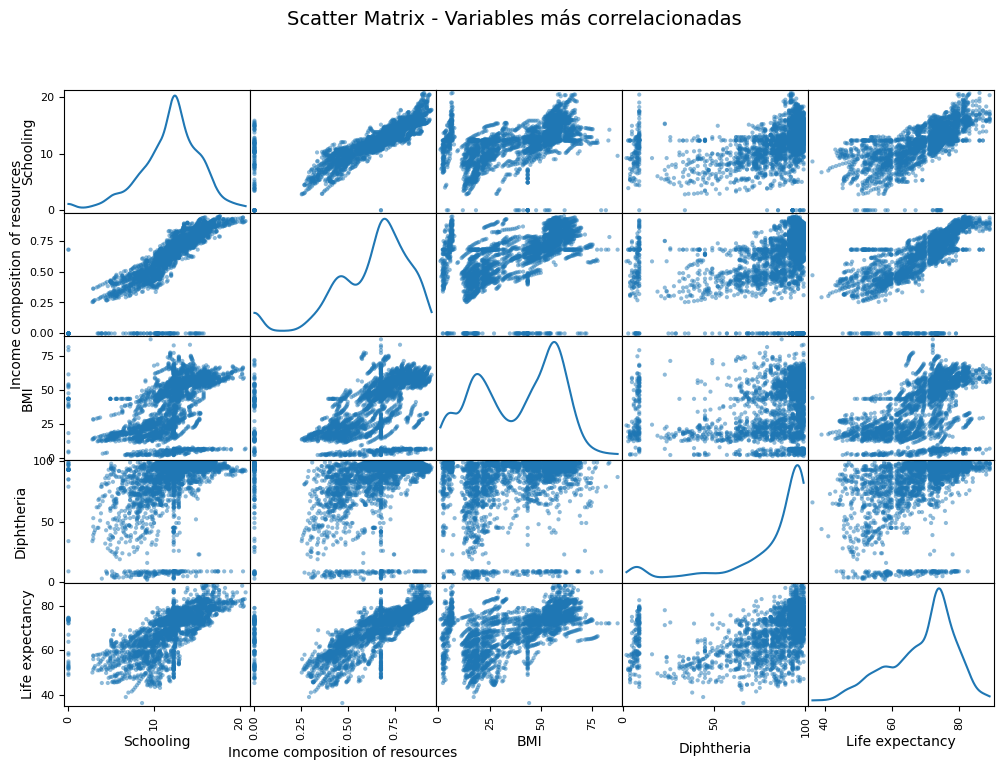

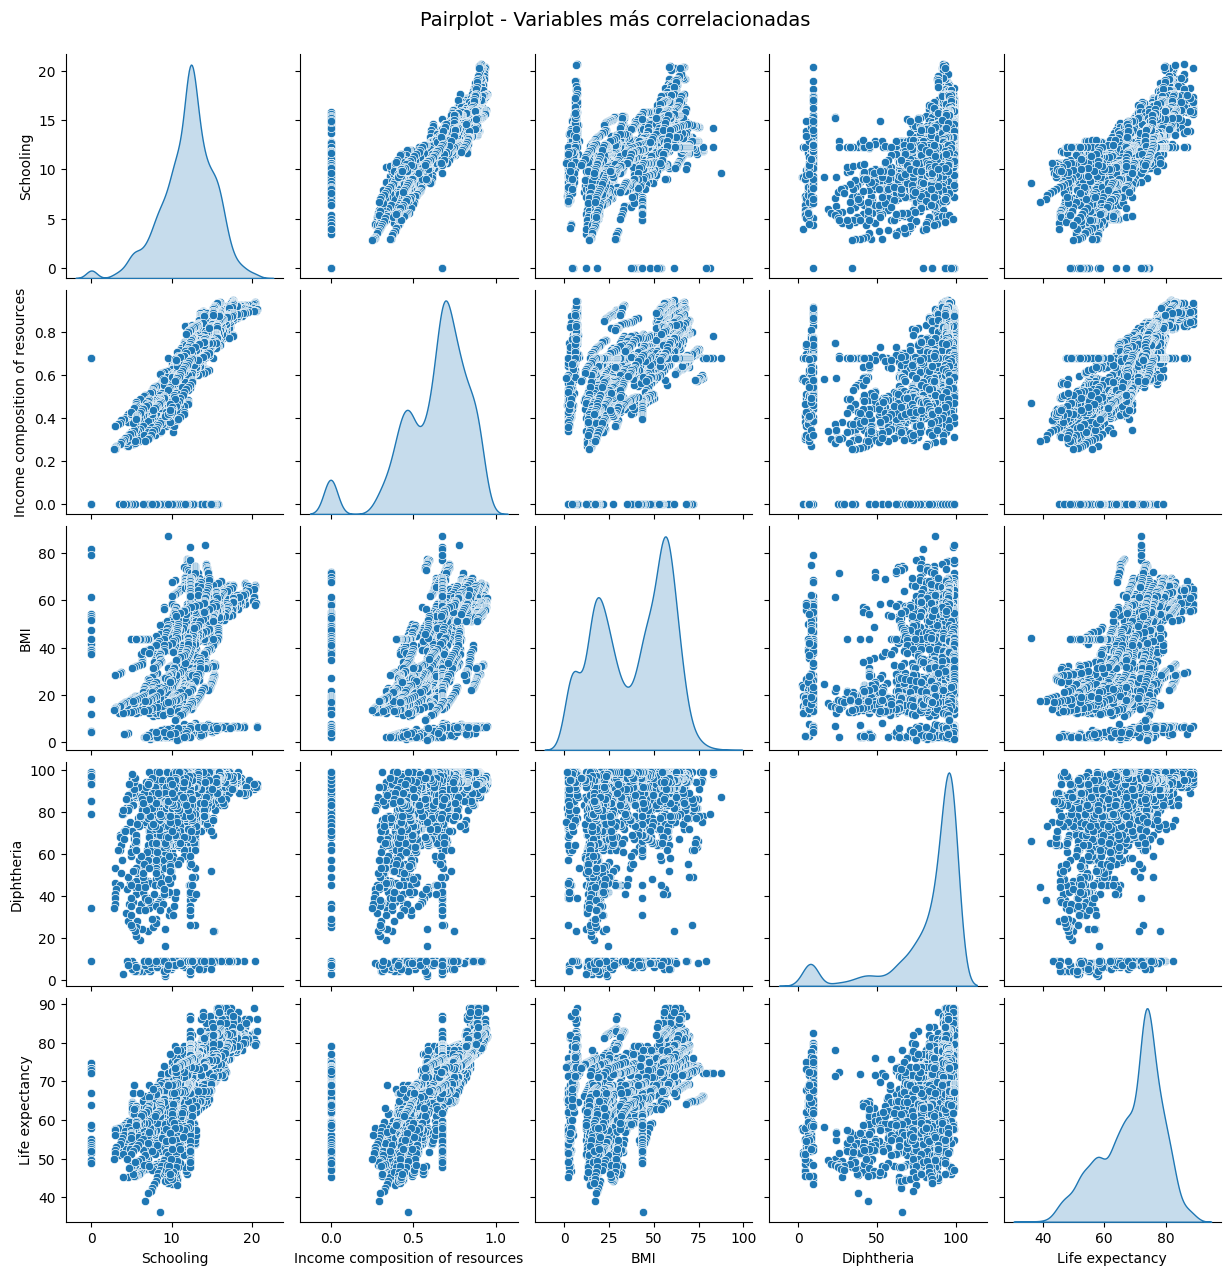

In [54]:
# ===================================
# EDA adicional: multivariableidad
# ===================================

# Scatter matrix con algunas variables más correlacionadas
from pandas.plotting import scatter_matrix

top_corr = correlaciones.index[1:5]  # top 4 más correlacionadas con la target
scatter_matrix(df[top_corr.tolist() + [target_col]], figsize=(12, 8), diagonal="kde")
plt.suptitle("Scatter Matrix - Variables más correlacionadas", fontsize=14)
plt.show()

# Pairplot con seaborn (cuidado, si hay muchas columnas puede ser lento)
sns.pairplot(df[top_corr.tolist() + [target_col]], diag_kind="kde")
plt.suptitle("Pairplot - Variables más correlacionadas", y=1.02, fontsize=14)
plt.show()
